In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [73]:
data = pd.read_csv('data/historic_demand_2009_2024_noNaN.csv')
data['settlement_date'] = pd.to_datetime(data['settlement_date'])

display(data.head())
display(data.info())
display(data.isna().sum())

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270112 entries, 0 to 270111
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   settlement_date            270112 non-null  datetime64[ns]
 1   settlement_period          270112 non-null  int64         
 2   period_hour                270112 non-null  object        
 3   nd                         270112 non-null  int64         
 4   tsd                        270112 non-null  int64         
 5   england_wales_demand       270112 non-null  int64         
 6   embedded_wind_generation   270112 non-null  int64         
 7   embedded_wind_capacity     270112 non-null  int64         
 8   embedded_solar_generation  270112 non-null  int64         
 9   embedded_solar_capacity    270112 non-null  int64         
 10  non_bm_stor                270112 non-null  int64         
 11  pump_storage_pumping       270112 non-null  int64   

None

settlement_date              0
settlement_period            0
period_hour                  0
nd                           0
tsd                          0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
ifa_flow                     0
ifa2_flow                    0
britned_flow                 0
moyle_flow                   0
east_west_flow               0
nemo_flow                    0
is_holiday                   0
dtype: int64

In [74]:
data.set_index("settlement_date", inplace=True)

data = data.asfreq('30min')

data.loc[data.england_wales_demand < 10000, "england_wales_demand"] = 0.0
data['england_wales_demand'] = data['england_wales_demand'].replace(0.0, np.nan)

# fill missing values by propagating the last valid observation forward
data.ffill(inplace=True)

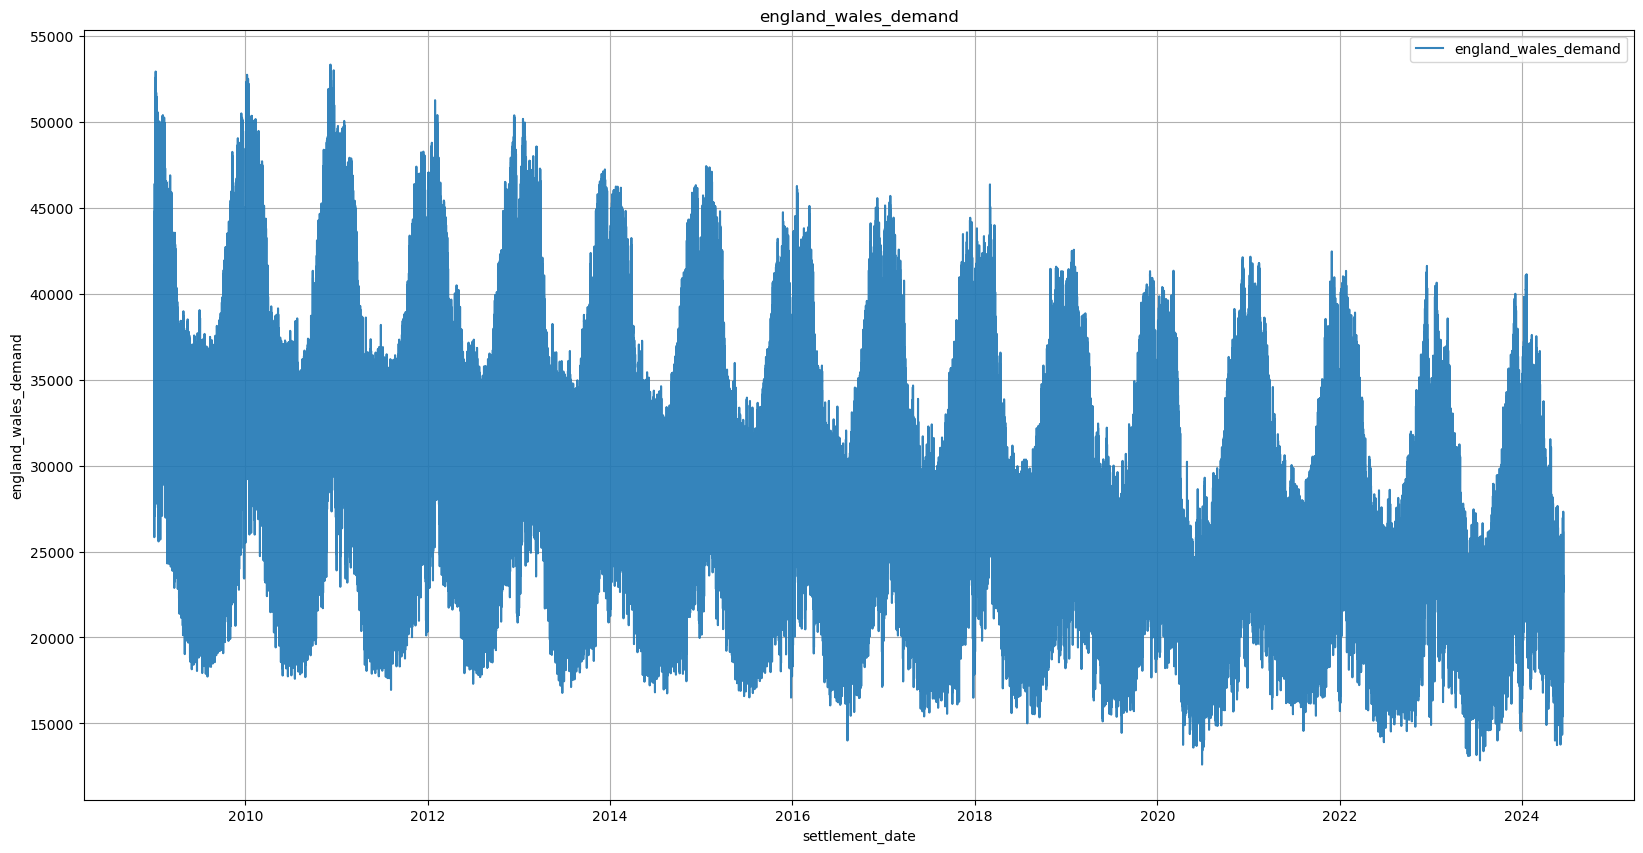

In [75]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='settlement_date', y="england_wales_demand", data=data, label="england_wales_demand", alpha = 0.9) 
plt.title("england_wales_demand")
plt.grid(True)
plt.legend()
plt.plot();

## Monthly Trends

In [76]:
df_demand = data[['england_wales_demand']]

df_demand_monthly = df_demand.resample("MS").sum()
df_demand_monthly = df_demand_monthly.iloc[:-1]

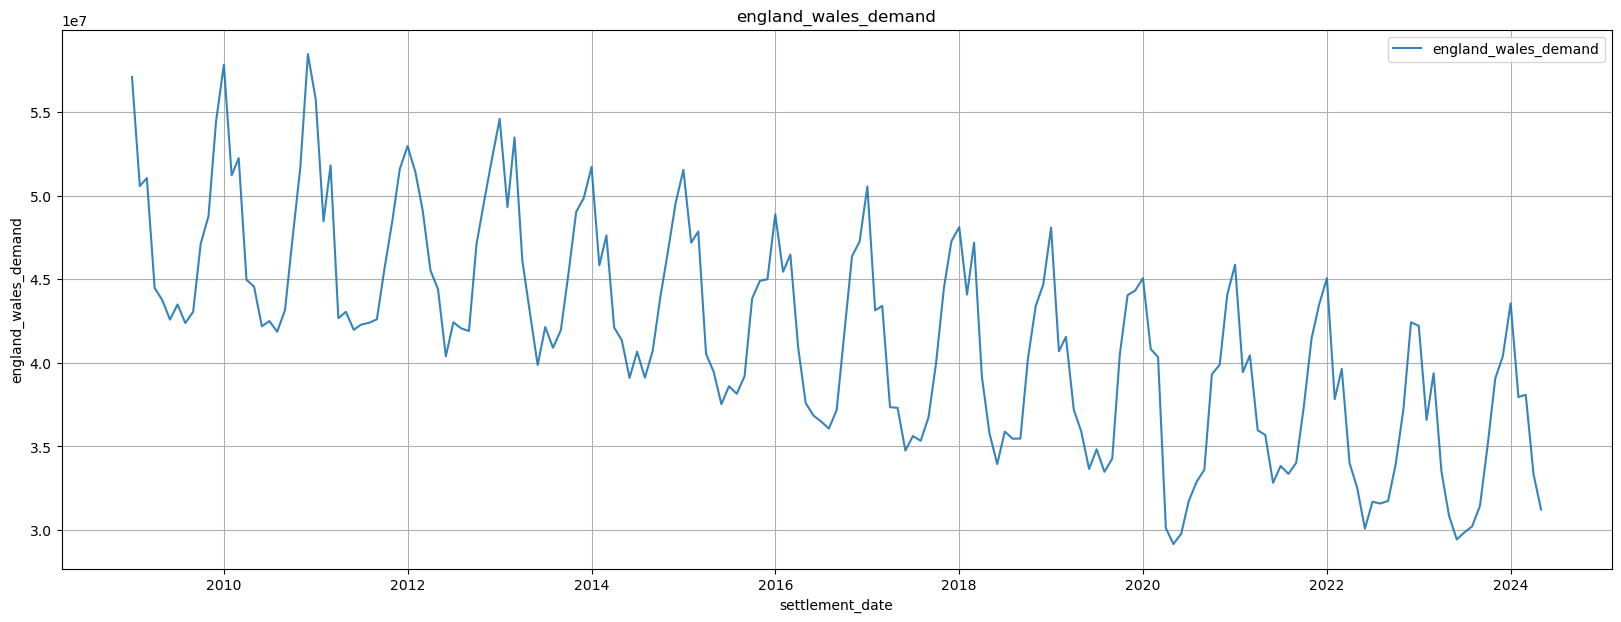

In [77]:
plt.figure(figsize=(20, 7))
sns.lineplot(x='settlement_date', y="england_wales_demand", data=df_demand_monthly, label="england_wales_demand", alpha = 0.9) 
plt.title("england_wales_demand")
plt.grid(True)
plt.legend()
plt.plot();

In [78]:
"""plt.figure(figsize=(15, 5))

# create the seasonal plot
month_plot(df_demand_monthly["england_wales_demand"], ax=plt.gca())

plt.title("england_wales_demand")
sns.despine()
plt.show()""";

In [79]:
df_demand_monthly

,england_wales_demand
settlement_date,
2009-01-01,57084786.0
2009-02-01,50568667.0
2009-03-01,51043547.0
2009-04-01,44476006.0
2009-05-01,43757738.0
...,...
2024-01-01,43561870.0
2024-02-01,37952422.0
2024-03-01,38091473.0


In [80]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270864 entries, 2009-01-01 00:00:00 to 2024-06-13 23:30:00
Freq: 30min
Data columns (total 1 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   england_wales_demand  270864 non-null  float64
dtypes: float64(1)
memory usage: 4.1 MB


In [81]:
data.drop(columns=['period_hour'], inplace=True)
data.drop(columns=['settlement_period'], inplace=True)

df_demand = data.copy()

In [82]:
df_demand.reset_index(inplace=True)
df_demand

,settlement_date,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,37910.0,38704.0,33939.0,54.0,1403.0,0.0,0.0,0.0,33.0,2002.0,0.0,0.0,-161.0,0.0,0.0,1.0
1,2009-01-01 00:30:00,38047.0,38964.0,34072.0,53.0,1403.0,0.0,0.0,0.0,157.0,2002.0,0.0,0.0,-160.0,0.0,0.0,1.0
2,2009-01-01 01:00:00,37380.0,38651.0,33615.0,53.0,1403.0,0.0,0.0,0.0,511.0,2002.0,0.0,0.0,-160.0,0.0,0.0,1.0
3,2009-01-01 01:30:00,36426.0,37775.0,32526.0,50.0,1403.0,0.0,0.0,0.0,589.0,1772.0,0.0,0.0,-160.0,0.0,0.0,1.0
4,2009-01-01 02:00:00,35687.0,37298.0,31877.0,50.0,1403.0,0.0,0.0,0.0,851.0,1753.0,0.0,0.0,-160.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270859,2024-06-13 21:30:00,25579.0,28807.0,23885.0,3440.0,6562.0,0.0,16396.0,0.0,12.0,2009.0,-1.0,-976.0,-451.0,-248.0,-340.0,0.0
270860,2024-06-13 22:00:00,24445.0,28283.0,22764.0,3372.0,6562.0,0.0,16396.0,0.0,13.0,1990.0,-1.0,-988.0,-446.0,-364.0,-615.0,0.0
270861,2024-06-13 22:30:00,23129.0,27076.0,21458.0,3303.0,6562.0,0.0,16396.0,0.0,12.0,1989.0,-1.0,-989.0,-388.0,-502.0,-626.0,0.0
270862,2024-06-13 23:00:00,21649.0,25621.0,20036.0,3215.0,6562.0,0.0,16396.0,0.0,8.0,2007.0,-1.0,-1008.0,-357.0,-528.0,-488.0,0.0


In [83]:
import requests
from datetime import datetime, timedelta
import json

## `Get data`

In [13]:
""""def daterange(start_date, end_date, delta):
    current = start_date
    while current < end_date:
        yield current
        current += delta

def fetch_weather_data(start_date, end_date, api_key):
    base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
    location = "UK"
    params = {
        "unitGroup": "metric",
        "include": "hours",
        "key": api_key,
        "contentType": "json"
    }
    url = f"{base_url}{location}/{start_date}/{end_date}"
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to retrieve data:", response.status_code, response.text)
        return None

def main(api_key):
    # 2009-01-01
    start_period = datetime(2009, 1, 1)
    # 2024-05-01
    end_period = datetime(2024, 5, 1)
    delta = timedelta(days=30)  # Adjust based on API limit, e.g., 30 days
    all_weather_data = []  # List to store all the weather data

    for start in daterange(start_period, end_period, delta):
        end = min(start + delta, end_period)
        weather_data = fetch_weather_data(start.strftime("%Y-%m-%d"), end.strftime("%Y-%m-%d"), api_key)
        
        if weather_data:
            all_weather_data.append(weather_data)  # Add the fetched data to the list
            print(f"Weather data retrieved for period {start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}.")
        else:
            print(f"Failed to fetch weather data for period {start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}.")

    # Optionally save the data to a file
    with open('weather_data_full.json', 'w') as f:
        import json
        json.dump(all_weather_data, f, indent=4)

    print("All weather data has been saved to 'weather_data_full.json'.")

if __name__ == "__main__":
    api_key = 'YBH5XURJGFMTCKTR47KY5KYH9'  # Replace with your actual API key
    main(api_key)
""""

SyntaxError: EOL while scanning string literal (216891695.py, line 52)

## `Parse the saved data`

In [14]:
def read_weather_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def analyze_hourly_weather_data(data):
    # Initialize lists to store hourly data
    hourly_data = []

    for period in data:
        if 'days' in period:
            for day in period['days']:
                day_date = day['datetime']  # Extract the date of the day
                if 'hours' in day:
                    for hour in day['hours']:
                        # Append each hour's data with the corresponding date
                        hourly_data.append({
                            'date': day_date,  # Include the date of the day
                            'datetime': hour['datetime'],
                            'temperature': hour.get('temp', 'No data'),
                            'conditions': hour.get('conditions', 'No data'),
                            'precip': hour.get('precip', 'No data'),
                            'cloudcover': hour.get('cloudcover', 'No data'),
                            'humidity': hour.get('humidity', 'No data'),
                            'windspeed': hour.get('windspeed', 'No data')
                        })
    return hourly_data

# Load the weather data
weather_data = read_weather_data('weather_data_full.json')
# Get hourly weather data
hourly_weather = analyze_hourly_weather_data(weather_data)


In [15]:
weather_data[0]['days'][0]['hours']

[{'datetime': '00:00:00',
  'datetimeEpoch': 1230768000,
  'temp': 0.1,
  'feelslike': -2.8,
  'humidity': 87.03,
  'dew': -1.8,
  'precip': 0.0,
  'precipprob': 0.0,
  'snow': 0.0,
  'snowdepth': 0.0,
  'preciptype': None,
  'windgust': None,
  'windspeed': 8.9,
  'winddir': 53.0,
  'pressure': None,
  'visibility': 5.4,
  'cloudcover': 100.0,
  'solarradiation': None,
  'solarenergy': None,
  'uvindex': None,
  'conditions': 'Overcast',
  'icon': 'cloudy',
  'stations': ['03769099999', '03672099999', '03781099999', '03772099999'],
  'source': 'obs'},
 {'datetime': '01:00:00',
  'datetimeEpoch': 1230771600,
  'temp': 0.2,
  'feelslike': -2.3,
  'humidity': 87.28,
  'dew': -1.7,
  'precip': 0.0,
  'precipprob': 0.0,
  'snow': 0.0,
  'snowdepth': 0.0,
  'preciptype': None,
  'windgust': None,
  'windspeed': 7.4,
  'winddir': 71.0,
  'pressure': None,
  'visibility': 5.3,
  'cloudcover': 100.0,
  'solarradiation': None,
  'solarenergy': None,
  'uvindex': None,
  'conditions': 'Overcast'

In [40]:
hourly_weather_df = pd.DataFrame(hourly_weather)
hourly_weather_df['datetime'] = pd.to_datetime(hourly_weather_df['date'] + ' ' + hourly_weather_df['datetime'])
hourly_weather_df.drop(columns=['date'], inplace=True)
hourly_weather_df.rename(columns={'datetime': 'settlement_date'}, inplace=True)
hourly_weather_df.set_index('settlement_date', inplace=True)

print(f"Duplicates: {hourly_weather_df.index.duplicated().sum()}")

# resample data to ensure no duplicates
aggregated_df = hourly_weather_df.groupby(hourly_weather_df.index).agg({
    'temperature': 'mean', 
    'precip': 'mean',
    'cloudcover': 'mean',
    'humidity': 'mean',
    'windspeed': 'mean',
    'conditions': lambda x: x.mode()[0] if not x.empty else None  # Mode for categorical data
})

aggregated_df.head()
print(f"Duplicates: {aggregated_df.index.duplicated().sum()}")

# resmaple to 30 minutes
resampled_df = aggregated_df.resample('30min').asfreq()

Duplicates: 4479
Duplicates: 0


In [45]:
# numeric columns
numeric_columns = resampled_df.select_dtypes(include=['float64', 'int']).columns
resampled_df[numeric_columns] = resampled_df[numeric_columns].interpolate(method='cubic')

# categorical columns
categorical_columns = resampled_df.select_dtypes(include=['object']).columns
resampled_df[categorical_columns] = resampled_df[categorical_columns].ffill()

display(resampled_df.head())

,temperature,precip,cloudcover,humidity,windspeed,conditions
settlement_date,,,,,,
2009-01-01 00:00:00,0.10,0.0,100.0,87.030,8.90,Overcast
2009-01-01 00:30:00,0.15,0.0,100.0,87.155,8.15,Overcast
2009-01-01 01:00:00,0.20,0.0,100.0,87.280,7.40,Overcast
2009-01-01 01:30:00,0.15,0.0,100.0,86.930,6.80,Overcast
2009-01-01 02:00:00,0.10,0.0,100.0,86.580,6.20,Overcast


In [85]:
df = pd.merge(resampled_df, df_demand, on='settlement_date', how='inner')
display(df)

,settlement_date,temperature,precip,cloudcover,humidity,windspeed,conditions,nd,tsd,england_wales_demand,...,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,0.10,0.0,100.0,87.030,8.90,Overcast,37910.0,38704.0,33939.0,...,0.0,0.0,33.0,2002.0,0.0,0.0,-161.0,0.0,0.0,1.0
1,2009-01-01 00:30:00,0.15,0.0,100.0,87.155,8.15,Overcast,38047.0,38964.0,34072.0,...,0.0,0.0,157.0,2002.0,0.0,0.0,-160.0,0.0,0.0,1.0
2,2009-01-01 01:00:00,0.20,0.0,100.0,87.280,7.40,Overcast,37380.0,38651.0,33615.0,...,0.0,0.0,511.0,2002.0,0.0,0.0,-160.0,0.0,0.0,1.0
3,2009-01-01 01:30:00,0.15,0.0,100.0,86.930,6.80,Overcast,36426.0,37775.0,32526.0,...,0.0,0.0,589.0,1772.0,0.0,0.0,-160.0,0.0,0.0,1.0
4,2009-01-01 02:00:00,0.10,0.0,100.0,86.580,6.20,Overcast,35687.0,37298.0,31877.0,...,0.0,0.0,851.0,1753.0,0.0,0.0,-160.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268794,2024-05-01 21:00:00,16.20,0.0,100.0,77.180,3.20,Overcast,29863.0,31356.0,27314.0,...,15905.0,0.0,14.0,1004.0,991.0,94.0,-451.0,-528.0,999.0,0.0
268795,2024-05-01 21:30:00,15.90,0.0,94.1,78.690,4.30,Overcast,28413.0,29906.0,25949.0,...,15905.0,0.0,14.0,1004.0,991.0,103.0,-451.0,-528.0,999.0,0.0
268796,2024-05-01 22:00:00,15.60,0.0,88.2,80.200,5.40,Partially cloudy,26682.0,28170.0,24395.0,...,15905.0,0.0,8.0,1004.0,991.0,165.0,-451.0,-529.0,910.0,0.0
268797,2024-05-01 22:30:00,15.70,0.0,74.1,79.975,7.90,Partially cloudy,25044.0,26533.0,22887.0,...,15905.0,0.0,9.0,1004.0,992.0,171.0,-451.0,-529.0,903.0,0.0


In [86]:
df.columns

Index(['settlement_date', 'temperature', 'precip', 'cloudcover', 'humidity',
       'windspeed', 'conditions', 'nd', 'tsd', 'england_wales_demand',
       'embedded_wind_generation', 'embedded_wind_capacity',
       'embedded_solar_generation', 'embedded_solar_capacity', 'non_bm_stor',
       'pump_storage_pumping', 'ifa_flow', 'ifa2_flow', 'britned_flow',
       'moyle_flow', 'east_west_flow', 'nemo_flow', 'is_holiday'],
      dtype='object')

In [87]:
df.head()

,settlement_date,temperature,precip,cloudcover,humidity,windspeed,conditions,nd,tsd,england_wales_demand,...,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,0.10,0.0,100.0,87.030,8.90,Overcast,37910.0,38704.0,33939.0,...,0.0,0.0,33.0,2002.0,0.0,0.0,-161.0,0.0,0.0,1.0
1,2009-01-01 00:30:00,0.15,0.0,100.0,87.155,8.15,Overcast,38047.0,38964.0,34072.0,...,0.0,0.0,157.0,2002.0,0.0,0.0,-160.0,0.0,0.0,1.0
2,2009-01-01 01:00:00,0.20,0.0,100.0,87.280,7.40,Overcast,37380.0,38651.0,33615.0,...,0.0,0.0,511.0,2002.0,0.0,0.0,-160.0,0.0,0.0,1.0
3,2009-01-01 01:30:00,0.15,0.0,100.0,86.930,6.80,Overcast,36426.0,37775.0,32526.0,...,0.0,0.0,589.0,1772.0,0.0,0.0,-160.0,0.0,0.0,1.0
4,2009-01-01 02:00:00,0.10,0.0,100.0,86.580,6.20,Overcast,35687.0,37298.0,31877.0,...,0.0,0.0,851.0,1753.0,0.0,0.0,-160.0,0.0,0.0,1.0


In [88]:
df.drop(columns=['embedded_solar_generation', 'embedded_solar_capacity', 'ifa_flow', 'ifa2_flow', 
                 'britned_flow', 'moyle_flow', 'east_west_flow', 'nemo_flow']
        , inplace=True)

In [89]:
map = df['settlement_date']<'2010-01-01'

correlation_matrix = df[map].drop(columns=['settlement_date', 'conditions']).corr()

In [90]:
df.columns

Index(['settlement_date', 'temperature', 'precip', 'cloudcover', 'humidity',
       'windspeed', 'conditions', 'nd', 'tsd', 'england_wales_demand',
       'embedded_wind_generation', 'embedded_wind_capacity', 'non_bm_stor',
       'pump_storage_pumping', 'is_holiday'],
      dtype='object')

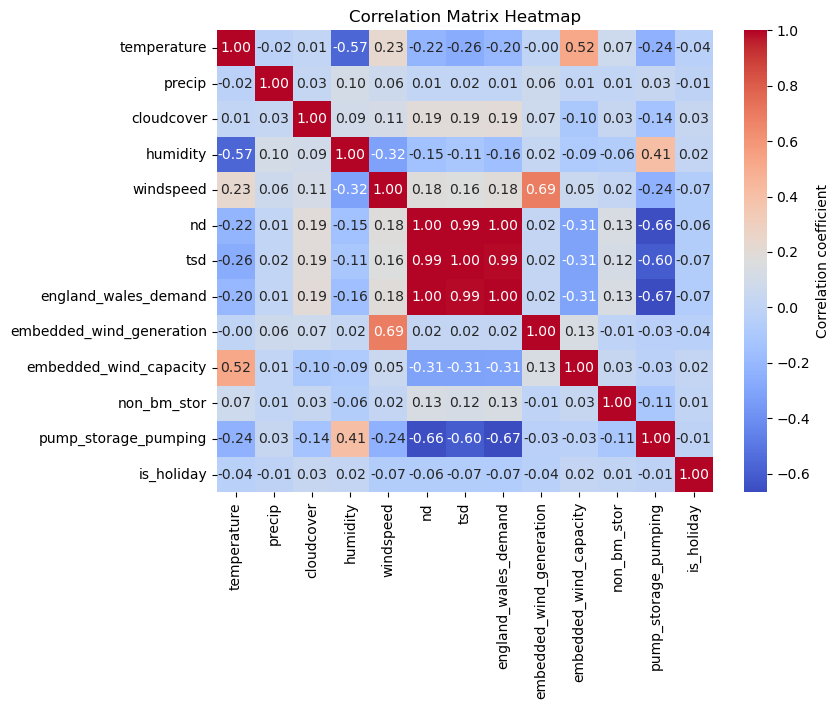

In [91]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation coefficient'})

plt.title('Correlation Matrix Heatmap')

plt.show()

In [92]:
df.columns

Index(['settlement_date', 'temperature', 'precip', 'cloudcover', 'humidity',
       'windspeed', 'conditions', 'nd', 'tsd', 'england_wales_demand',
       'embedded_wind_generation', 'embedded_wind_capacity', 'non_bm_stor',
       'pump_storage_pumping', 'is_holiday'],
      dtype='object')

In [93]:
df_train = df.drop(columns=['tsd', 'england_wales_demand', 'embedded_wind_generation', 'embedded_wind_capacity', 'non_bm_stor'])

In [94]:
print(df_train.columns)
df_train.head()

Index(['settlement_date', 'temperature', 'precip', 'cloudcover', 'humidity',
       'windspeed', 'conditions', 'nd', 'pump_storage_pumping', 'is_holiday'],
      dtype='object')


,settlement_date,temperature,precip,cloudcover,humidity,windspeed,conditions,nd,pump_storage_pumping,is_holiday
0,2009-01-01 00:00:00,0.10,0.0,100.0,87.030,8.90,Overcast,37910.0,33.0,1.0
1,2009-01-01 00:30:00,0.15,0.0,100.0,87.155,8.15,Overcast,38047.0,157.0,1.0
2,2009-01-01 01:00:00,0.20,0.0,100.0,87.280,7.40,Overcast,37380.0,511.0,1.0
3,2009-01-01 01:30:00,0.15,0.0,100.0,86.930,6.80,Overcast,36426.0,589.0,1.0
4,2009-01-01 02:00:00,0.10,0.0,100.0,86.580,6.20,Overcast,35687.0,851.0,1.0


In [95]:
df_train.set_index('settlement_date', inplace=True)

In [96]:
df_train.to_csv('df_train.csv')

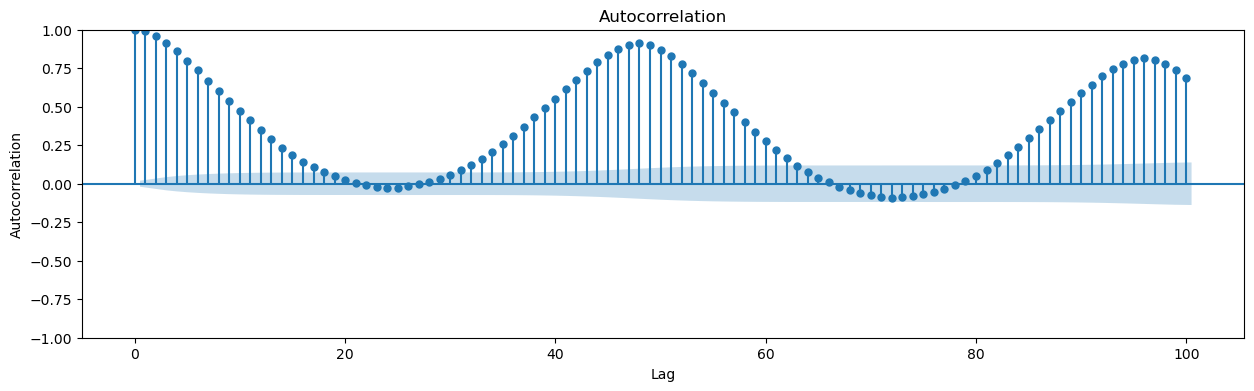

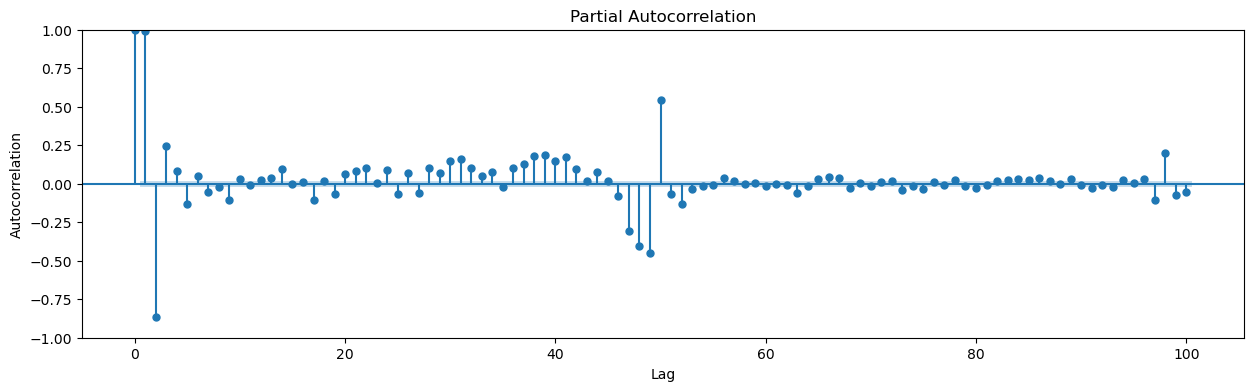

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 4))
# put the acf plot on the current axis
plot_acf(df_train["nd"][:10000], lags=100, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(15, 4))
plot_pacf(df_train["nd"][:10000].dropna(), lags=100, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

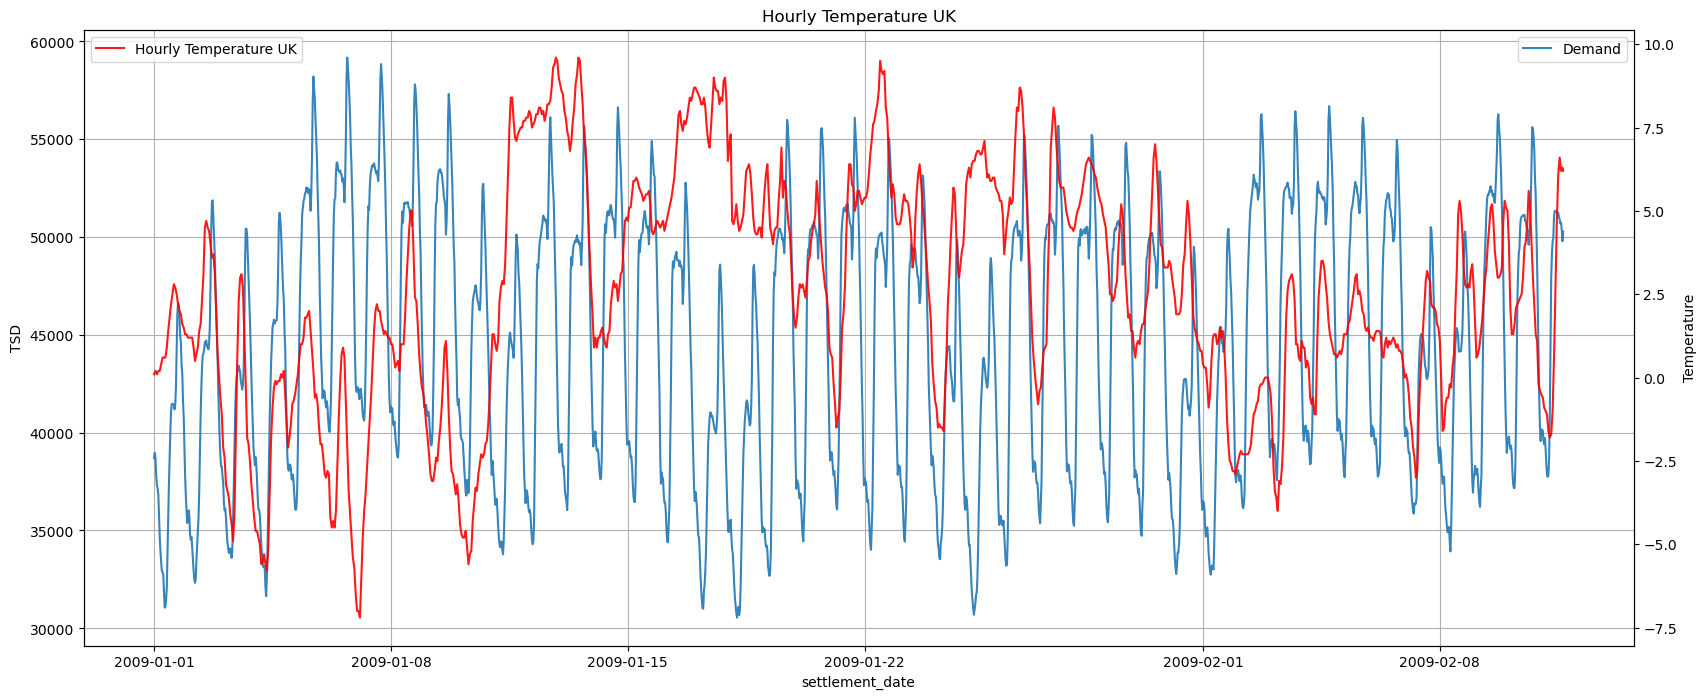

In [100]:
plt.figure(figsize=(20, 8))

# Plotting on the first y-axis
ax1 = sns.lineplot(x='settlement_date', y="tsd", data=df[:2000], label="Demand", alpha=0.9)
ax1.set_ylabel('TSD')

# Create a second y-axis
ax2 = ax1.twinx()

# Example modification: scaling the temperature
# Uncomment and adjust as per your actual data
sns.lineplot(x='settlement_date', y=df.temperature, data=df[:2000], label="Hourly Temperature UK", alpha=0.9, ax=ax2, color='r')
ax2.set_ylabel('Temperature')

# Set the title and labels
plt.title("Hourly Temperature UK")
ax1.grid(True)
plt.legend(loc='upper left')

plt.show()

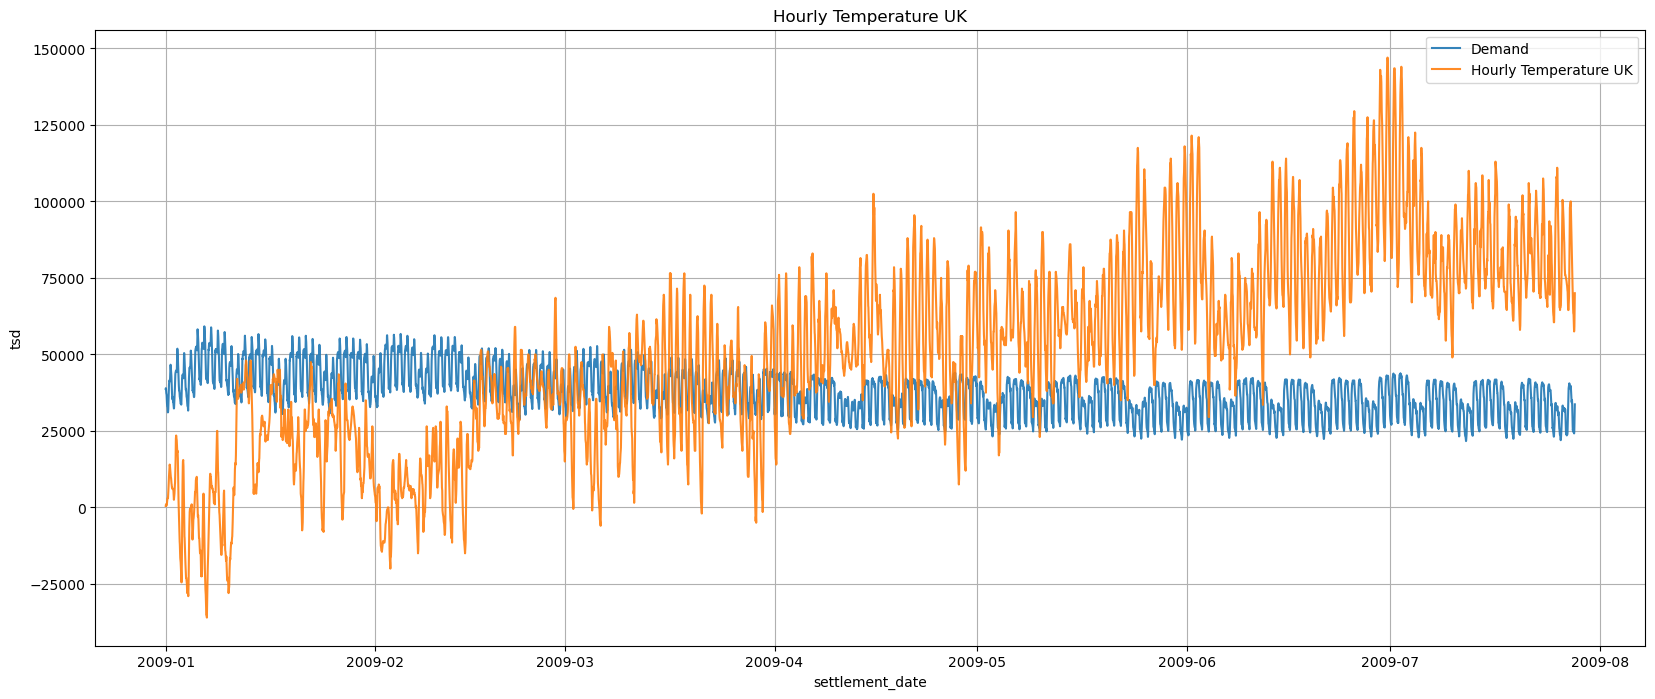

In [101]:
end = 10000

plt.figure(figsize=(20, 8))
sns.lineplot(x='settlement_date', y="tsd", data=df[:end], label="Demand", alpha = 0.9) 
# sns.lineplot(x='settlement_date', y=df.cloudcover*1000, data=df[:end], label="Hourly Temperature UK", alpha = 0.9) 
sns.lineplot(x='settlement_date', y=df.temperature*5000, data=df[:end], label="Hourly Temperature UK", alpha = 0.9) 
# sns.lineplot(x='settlement_date', y=df.is_holiday*50000, data=df[:end], label="Holidays", alpha = 0.9) 
plt.title("Hourly Temperature UK")
plt.grid(True)
plt.legend()
plt.plot();

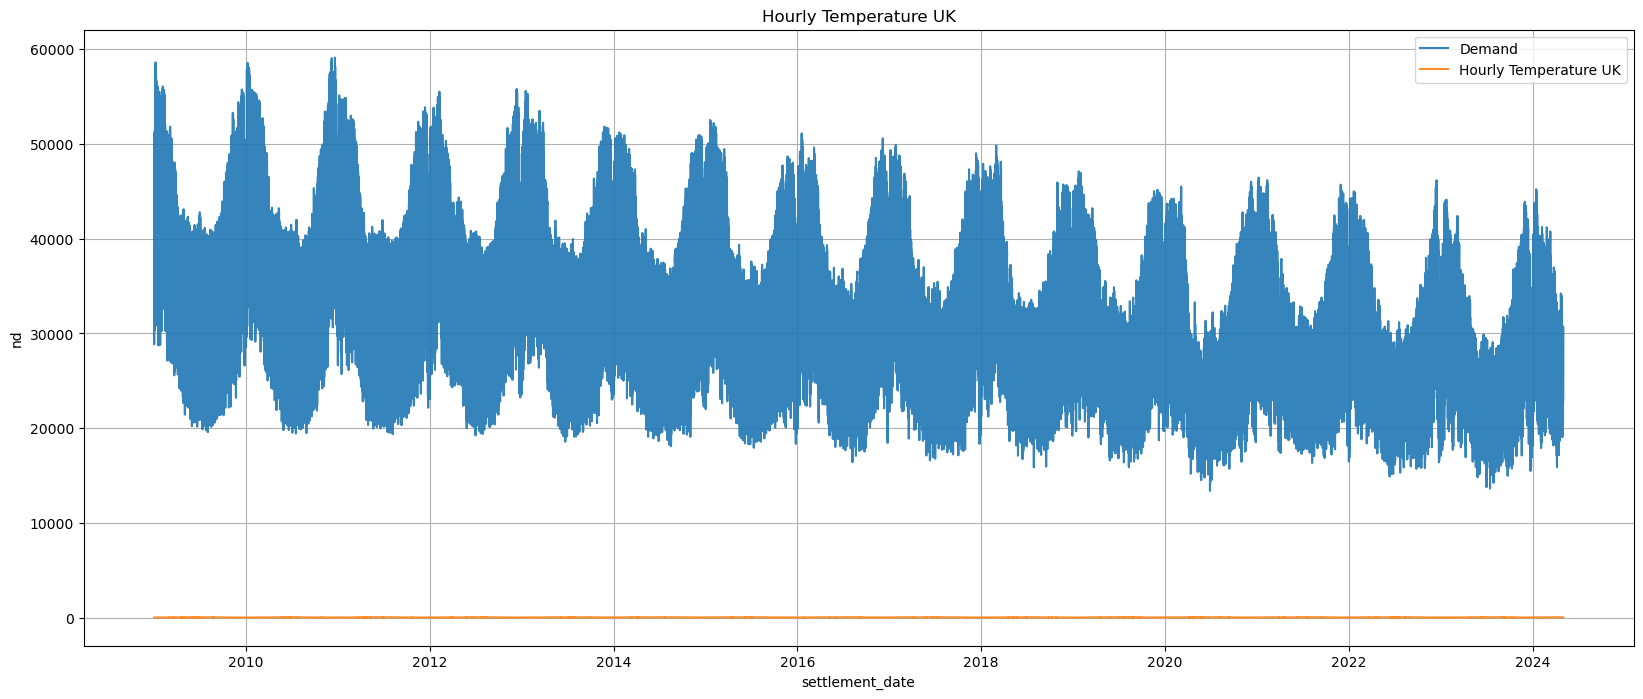

In [102]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='settlement_date', y="nd", data=df, label="Demand", alpha = 0.9) 
sns.lineplot(x='settlement_date', y="temperature", data=df, label="Hourly Temperature UK", alpha = 0.9) 
plt.title("Hourly Temperature UK")
plt.grid(True)
plt.legend()
plt.plot();

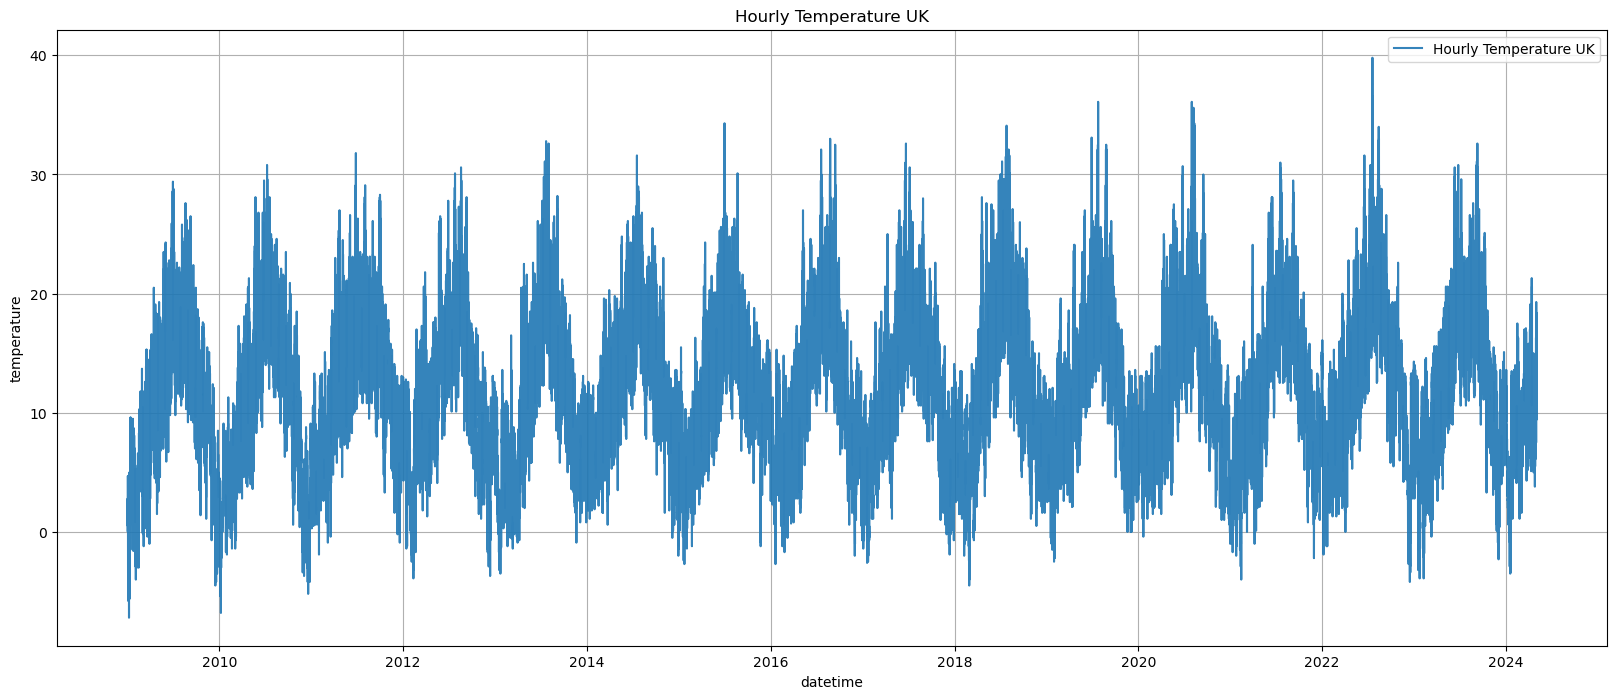

In [ ]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='datetime', y="temperature", data=hourly_weather_df, label="Hourly Temperature UK", alpha = 0.9) 
plt.title("Hourly Temperature UK")
plt.grid(True)
plt.legend()
plt.plot();